In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Initialising parameters
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
#Choose data
mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)
x_train, x_test = x_train / 255.0, x_test / 255.0

input_shape = (img_rows,img_cols,1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [468]:
#Defining model
model = Sequential()
model.add(Conv2D(10, kernel_size=(3, 3),  # Start with Convolutional layer with 10 kernel depth with 3x3 dimensions,
                 activation='relu',       # With RELU activator
                 strides=1,               # With 1 stride
                 padding='same',          # And same padding (to have same dimensions)
                 input_shape=input_shape,
                 use_bias=False))   

model.add(Conv2D(10, kernel_size=(3, 3),
                 activation='relu',
                 strides=1,               # With 1 stride
                 padding='same',
                 use_bias=False))         # Second layer is convolutional layer as well with same parameters       

model.add(MaxPooling2D(pool_size=(2, 2),  # Third layer is pooling layer of 2x2 dimensionality 
                 strides=None))           # With no strides (halves the output))        
model.add(Dropout(0.25))
model.add(Flatten())                      # Command to flatten the output for Dense layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 28, 28, 10)        90        
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 10)        900       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 1960)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                125504    
_________________________________________________________________
dropout_41 (Dropout)         (None, 64)              

In [469]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.7077 - accuracy: 0.7512 - val_loss: 0.4233 - val_accuracy: 0.8450
Epoch 2/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.4758 - accuracy: 0.8303 - val_loss: 0.3599 - val_accuracy: 0.8689
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.4242 - accuracy: 0.8500 - val_loss: 0.3386 - val_accuracy: 0.8731
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3935 - accuracy: 0.8603 - val_loss: 0.3199 - val_accuracy: 0.8851
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3758 - accuracy: 0.8654 - val_loss: 0.3044 - val_accuracy: 0.8878
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3579 - accuracy: 0.8710 - val_loss: 0.2991 - val_accuracy: 0.8920
Epoch 7/10
60000/60000 [==============================] 

In [0]:
def im2col(input,axis = "column"):
  if axis == "column":
    final = input.reshape(-1,1)
  if axis == "row":
    final = input.reshape(1,-1)
  return final

def zero_pad(input):
  return np.pad(input,((1,1),(1,1)),"constant")

def convolution(input, kernel, pad = "Same"):
  if pad == "Same":
    input = zero_pad(input)
  input_size = input.shape[0]
  col_kernel = im2col(kernel,"row")
  kernel_size = col_kernel.shape[1]
  A = np.empty((kernel_size,0))

  for i in range(1,input_size-1):
    for j in range(1,input_size-1):
      A = np.append(A,im2col(input[i-1:i+2,j-1:j+2]), axis = 1)
  
  col_kernel = im2col(kernel,"row")
  conv = col_kernel@A
  return conv.reshape(input_size-2,input_size-2)

def pooling(input, mod = "max", stride = 2):
  input_size = input.shape[0]
  A = np.empty((0,1))
  if mod == "max":
    for i in range(0,input_size,stride):
      for j in range(0,input_size,stride):
        A = np.append(A,np.max(input[i:i+2,j:j+2]))
  elif mod == "mean":
    for i in range(0,input_size,stride):
      for j in range(0,input_size,stride):
        A = np.append(A,np.mean(input[i:i+2,j:j+2]))

  return A.reshape(int(input_size/2),int(input_size/2))


In [0]:
kernel_1 = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]])
kernel_2 = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

In [0]:
kernel_1 = np.array([[-1,-1,-1],
                   [2,2,2],
                   [-1,-1,-1]])
kernel_2 = np.array([[-1,2,-1],
                   [-1,2,-1],
                   [-1,2,-1]])

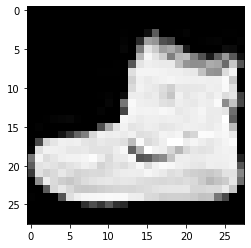

In [473]:
img_1 = x_train[0].squeeze(axis = 2) #0 is 5, 2 is 4, 31 is 8, 6 is 1, 8 is 4
img_2 = x_train[31].squeeze(axis = 2) 
plt.imshow(img_1,cmap = "Greys_r")

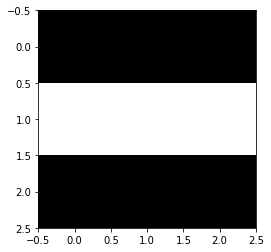

In [474]:
plt.imshow(kernel_1,cmap = "Greys_r")

First conv layer without relu

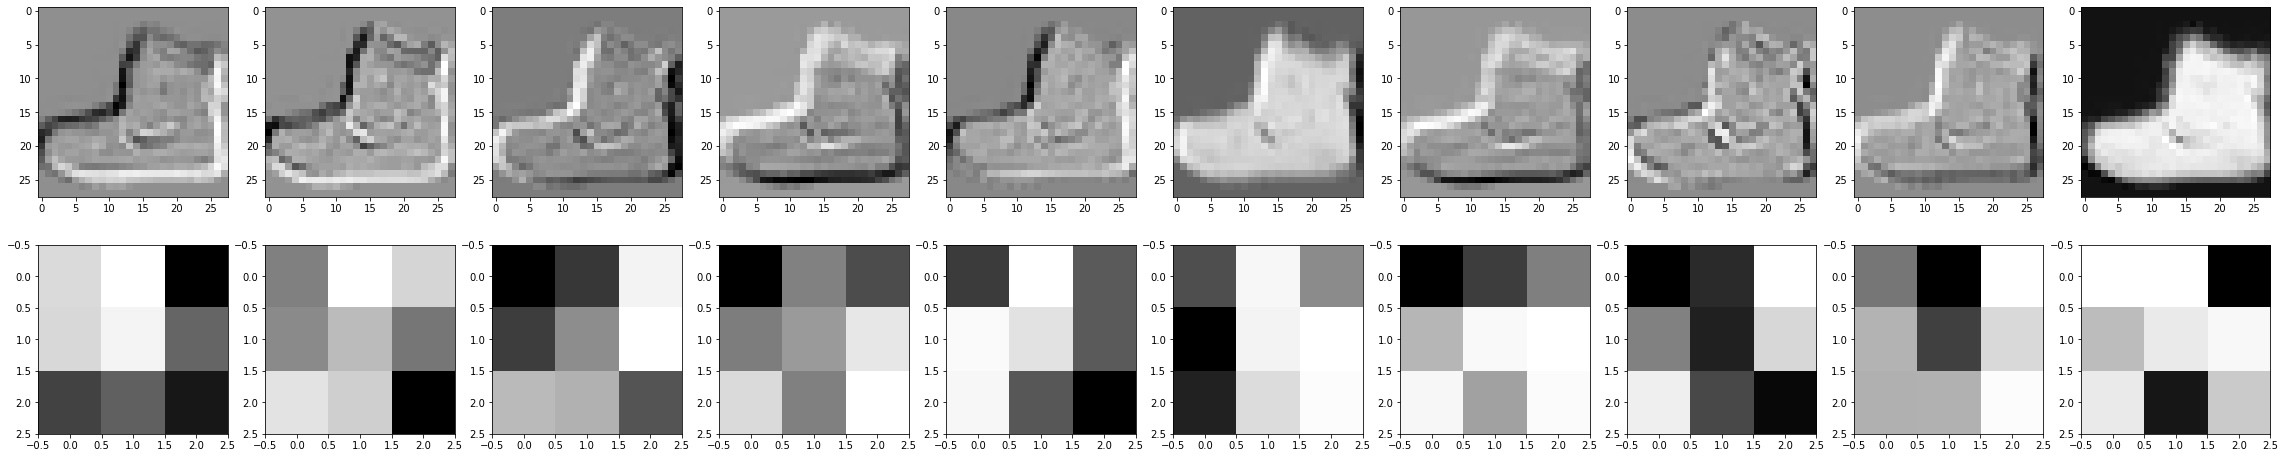

In [477]:
k = 10
fig, axes = plt.subplots(2,k,figsize = (k*4,8))
for i in range(k):
  conv = convolution(img_1,model.weights[0][:,:,0,i].numpy())
  axes[0,i].imshow(conv, cmap = "Greys_r")
  axes[1,i].imshow(model.weights[0][:,:,0,i].numpy(), cmap = "Greys_r")

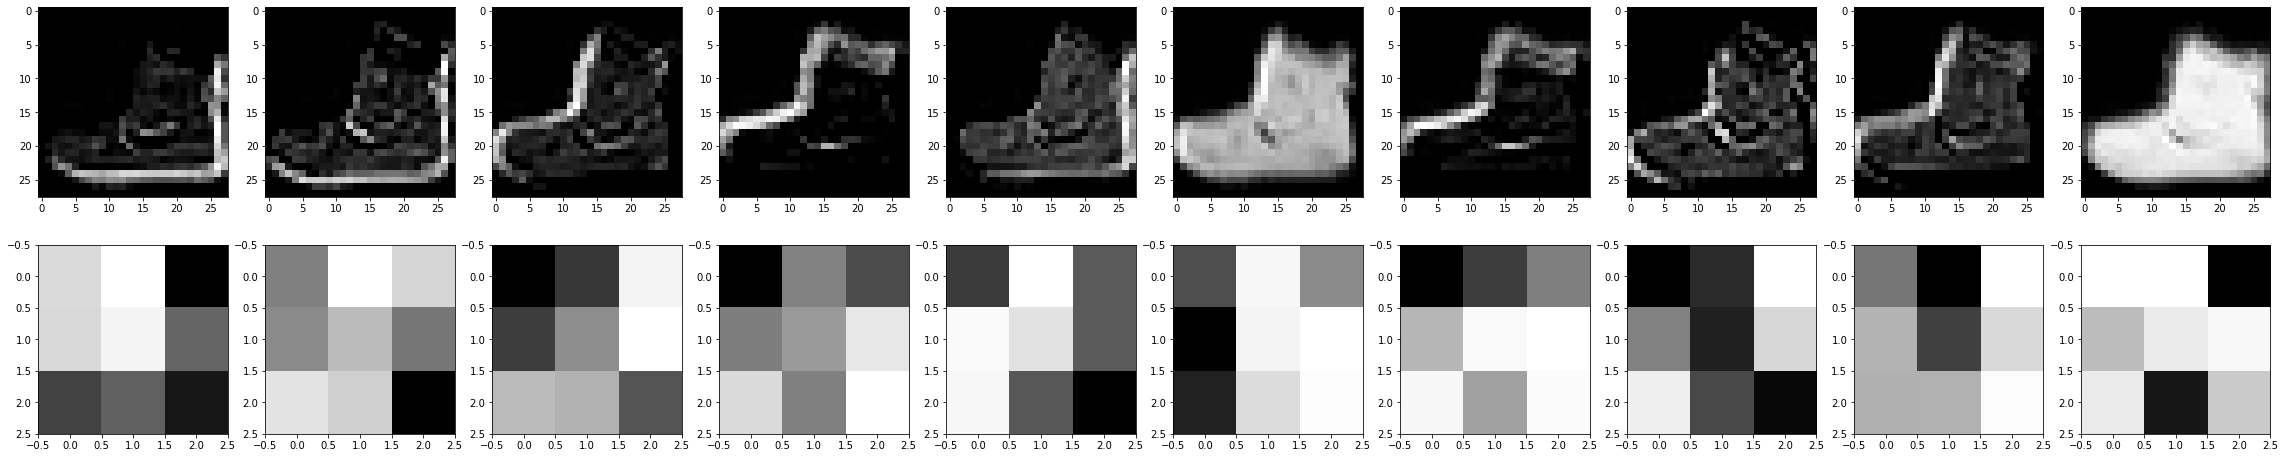

In [478]:
conv_list_1 = []

k = 10
fig, axes = plt.subplots(2,k,figsize = (k*4,8))
for i in range(k):
  conv = convolution(img_1,model.weights[0][:,:,0,i].numpy())#+model.weights[1][i].numpy()
  relu_conv = np.maximum(conv,0)
  axes[0,i].imshow(relu_conv, cmap = "Greys_r")
  axes[1,i].imshow(model.weights[0][:,:,0,i].numpy(), cmap = "Greys_r") 
  conv_list_1.append(relu_conv)

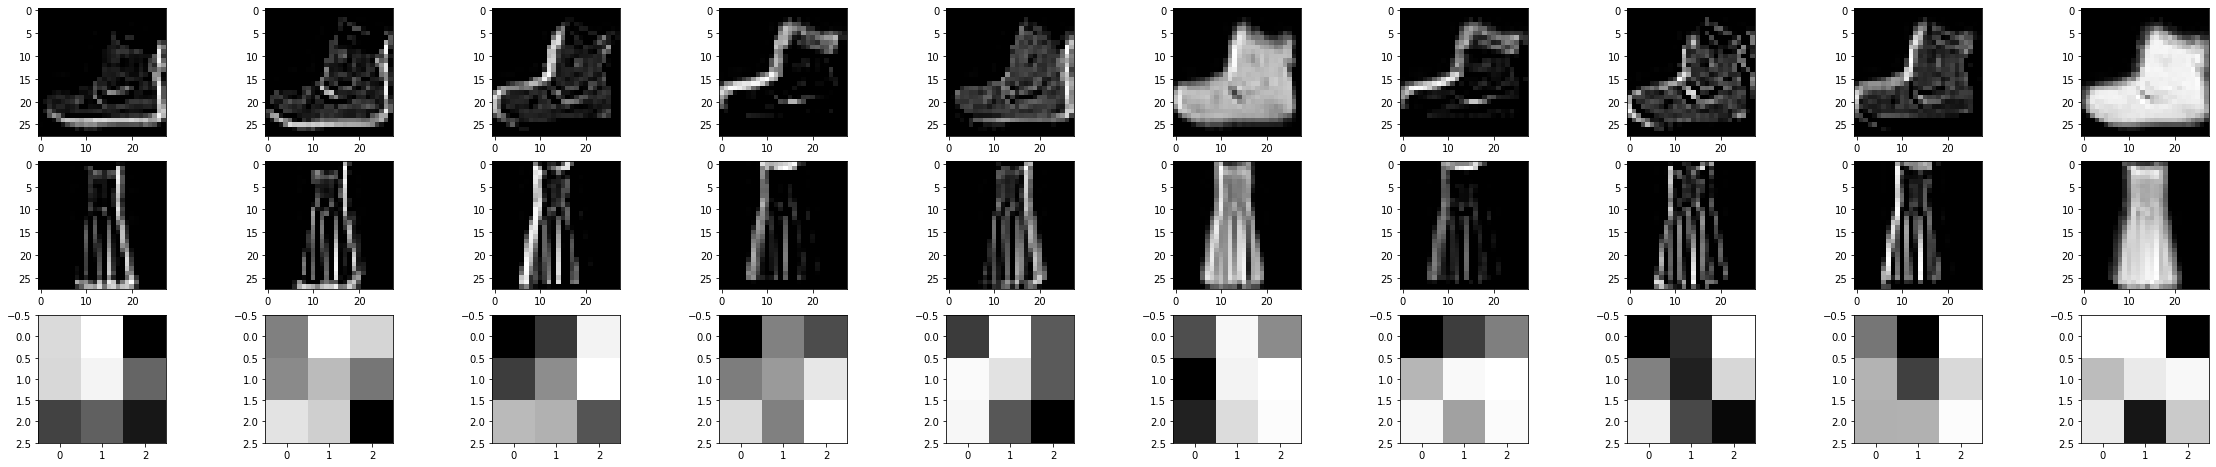

In [479]:
conv_list_1 = []

k = 10
fig, axes = plt.subplots(3,k,figsize = (k*4,8))
for i in range(k):
  conv_1 = convolution(img_1,model.weights[0][:,:,0,i].numpy())
  relu_conv = np.maximum(conv_1,0)

  conv_2 = convolution(img_2,model.weights[0][:,:,0,i].numpy())
  relu_conv_2 = np.maximum(conv_2,0)

  axes[0,i].imshow(relu_conv, cmap = "Greys_r")
  axes[1,i].imshow(relu_conv_2, cmap = "Greys_r")
  axes[2,i].imshow(model.weights[0][:,:,0,i].numpy(), cmap = "Greys_r") 
  conv_list_1.append(relu_conv)

Second layer

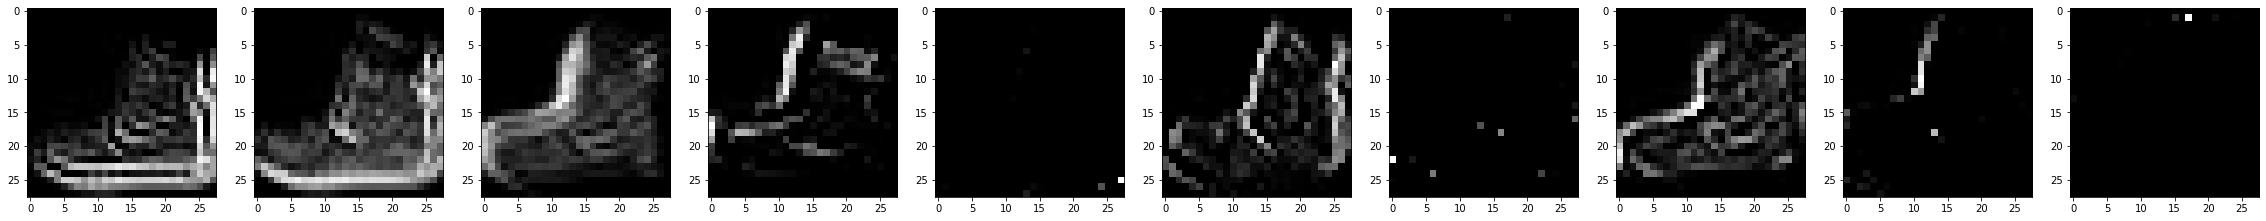

In [480]:
conv_list_2 = []

k = 10
fig, axes = plt.subplots(1,k,figsize = (k*4,8))
for i in range(k):
  conv_1 = np.empty((28,28))
  for j in range(k):
    conv_1 =+ convolution(conv_list_1[i],model.weights[1][:,:,j,i].numpy())
  relu_conv = np.maximum(conv_1,0)
  axes[i].imshow(relu_conv,cmap = "Greys_r")
  conv_list_2.append(relu_conv)

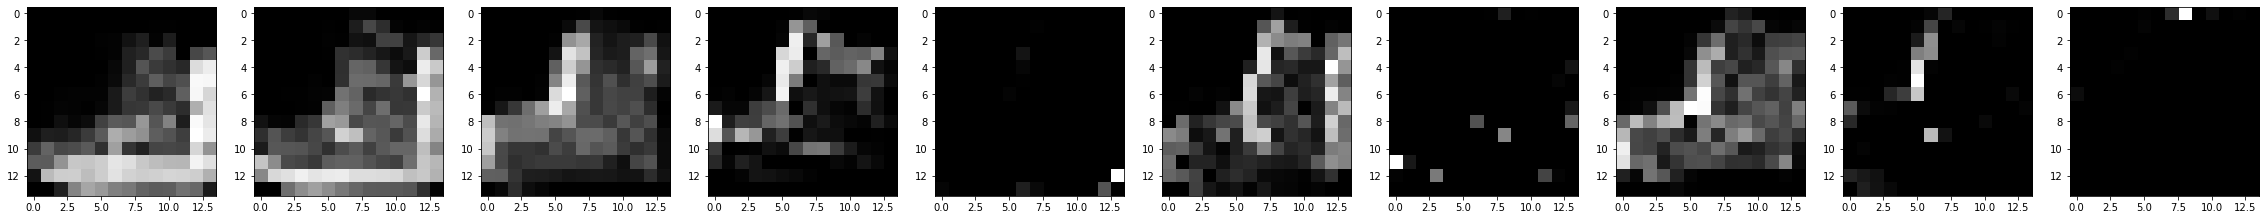

In [481]:
k = 10

fig, axes = plt.subplots(1,k,figsize = (k*4,8))
for i in range(k):
  axes[i].imshow(pooling(conv_list_2[i]),cmap = "Greys_r")

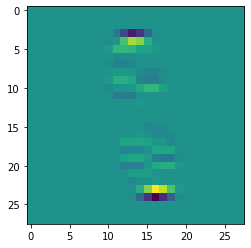

In [195]:
conv = convolution(exp_one,kernel_1)
plt.imshow(conv)

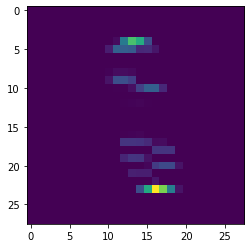

In [56]:
conv = np.maximum(conv, 0)
plt.imshow(conv)

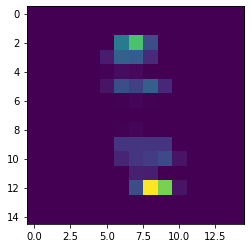

In [57]:
pooled = zero_pad(conv)
pooled = pooling(pooled,"max")
plt.imshow(pooled)

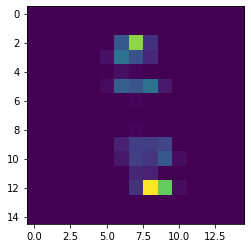

In [58]:
pooled = zero_pad(conv)
pooled = pooling(pooled,"mean")
plt.imshow(pooled)